In [4]:
import zipfile
import pandas as pd
from io import BytesIO

# Define the path to the ZIP file
zip_file_path = r"C:\Users\malli\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_340326.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP archive
    print(zip_ref.namelist())
    
    # Extract the specific CSV file into a BytesIO object
    with zip_ref.open('API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv') as csv_file:
        # Read the CSV file into a DataFrame
        data_df = pd.read_csv(csv_file, skiprows=4)

# Display the first few rows of the DataFrame
print(data_df.head())



['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv']
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979

['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv']
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.

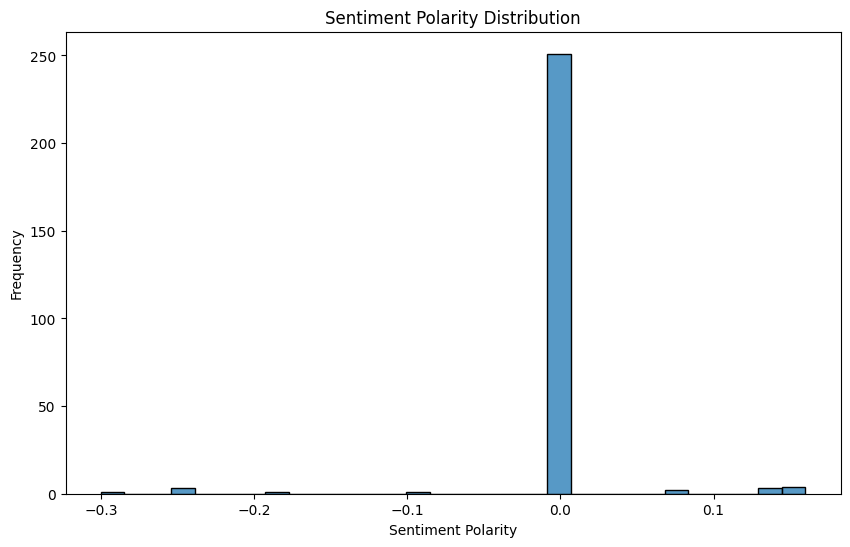

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the data from the uploaded file
zip_file_path = r"C:\Users\malli\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_340326.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP archive
    print(zip_ref.namelist())
    
    # Extract the specific CSV file into a BytesIO object
    with zip_ref.open('API_SP.POP.TOTL_DS2_en_csv_v2_340326.csv') as csv_file:
        # Read the CSV file into a DataFrame
        data_df = pd.read_csv(csv_file, skiprows=4)

# Display the columns of the DataFrame
print(data_df.columns)

# Display the first few rows of the DataFrame
print(data_df.head())

# Assuming the column 'Country Name' contains text data for sentiment analysis, we will use it
# In real scenarios, replace 'Country Name' with the appropriate text column

# Filter out rows where the text column is not a string (if necessary)
data_df = data_df[data_df['Country Name'].apply(lambda x: isinstance(x, str))]

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis
data_df['Polarity'] = data_df['Country Name'].apply(get_sentiment)

# Visualize the sentiment patterns
plt.figure(figsize=(10, 6))
sns.histplot(data_df, x='Polarity', bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
